Using Bi-lateral filter (only) for ampli image..... achieved significant noise removal

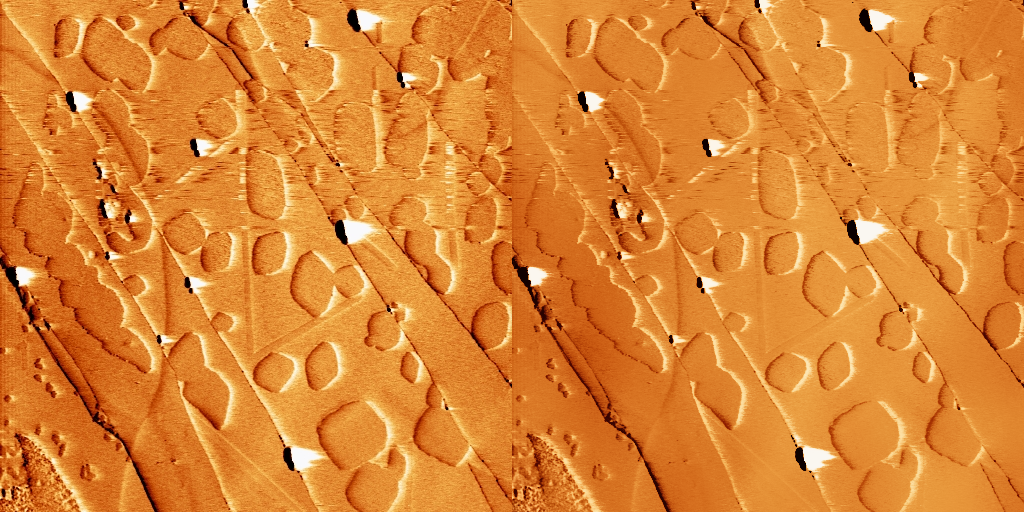

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
img = cv2.imread("/content/1_amplitude.jpg")

# Apply bilateral filter
bilFil = cv2.bilateralFilter(img, 60, 60, 60)

# Display original and filtered images side by side
combined_image = np.hstack((img, bilFil))
cv2_imshow(combined_image)

Using bi-lateral filter (only) for phase image....achieved significant noise removal but bottom part got blured

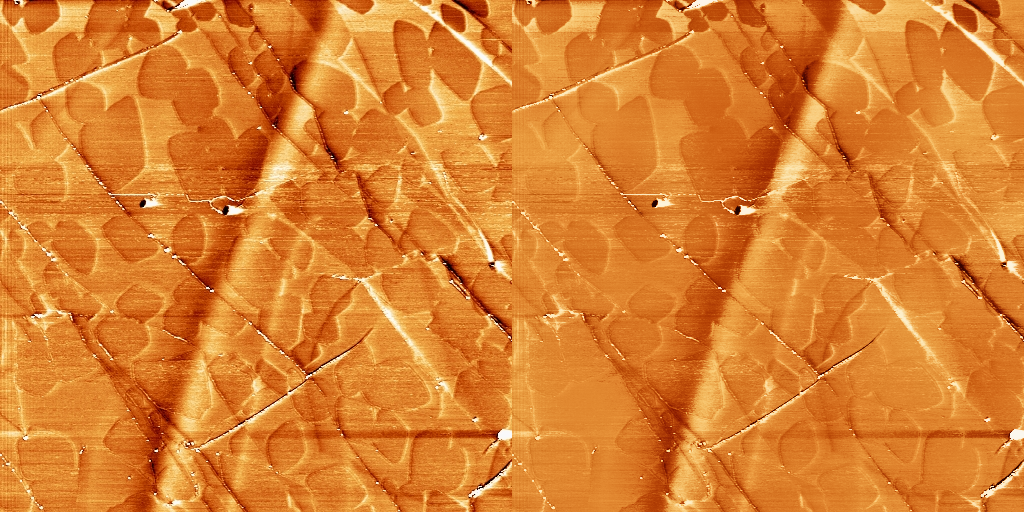

Output image saved successfully at: /content/output_image.jpg


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
img = cv2.imread("/content/3_phase.jpg")

# Apply bilateral filter
bilFil = cv2.bilateralFilter(img, 60, 60, 60)

# Display original and filtered images side by side
combined_image = np.hstack((img, bilFil))
cv2_imshow(combined_image)

# Save the output image
output_path = "/content/output_image.jpg"
cv2.imwrite(output_path, bilFil)

print("Output image saved successfully at:", output_path)

Did edge sharpening after bilateral filtering..... no effect till now.... ulta noise badha diya

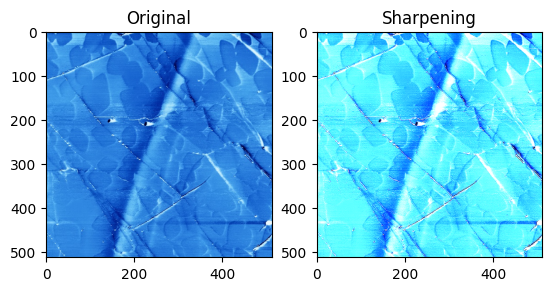

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/output_image.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Create the sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(image, -1, kernel)

#Save the image
cv2.imwrite('sharpened_image.jpg', sharpened_image)

#Plot the sharpened image
plt.subplot(1, 2, 2)
plt.title("Sharpening")
plt.imshow(sharpened_image)
plt.show()

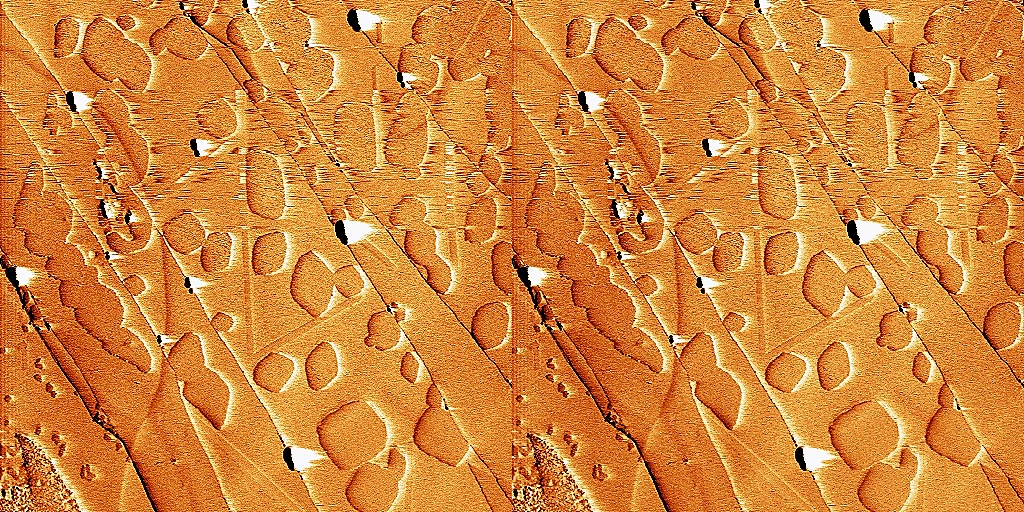

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
img = cv2.imread("/content/sharpened_image.jpg")

# Apply bilateral filter
bilFil = cv2.bilateralFilter(img, 1, 50, 60)

# Display original and filtered images side by side
combined_image = np.hstack((img, bilFil))
cv2_imshow(combined_image)

First did sharpening then bilateral filtering

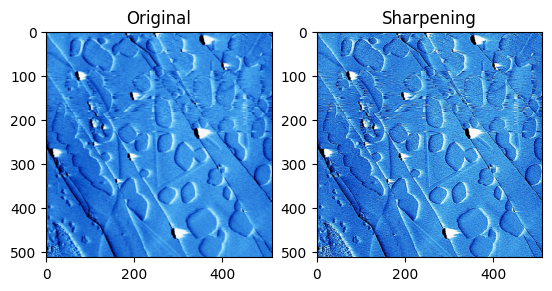

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1_amplitude.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Create the sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(image, -1, kernel)

#Save the image
cv2.imwrite('sharpened_image.jpg', sharpened_image)

#Plot the sharpened image
plt.subplot(1, 2, 2)
plt.title("Sharpening")
plt.imshow(sharpened_image)
plt.show()

Bi-lateral filtering on 3rd amplitude img

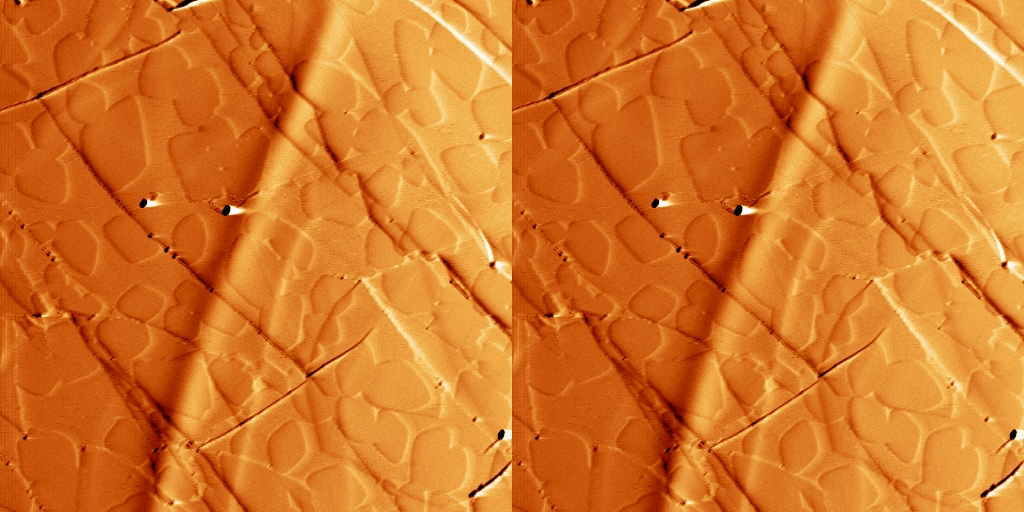

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
img = cv2.imread("/content/3_amplitude.jpg")

# Apply bilateral filter
bilFil = cv2.bilateralFilter(img, 5, 5, 5)

# Display original and filtered images side by side
combined_image = np.hstack((img, bilFil))
cv2_imshow(combined_image)

Starting with patches in fourier

In [ ]:
! pip install patchify

In [ ]:
import numpy as np
from patchify import patchify
from PIL import Image
import cv2

# Load the original image
ocean = np.array(Image.open("/content/1_amplitude.jpg"))  # Assuming this is your original image
print("Original Image Shape:", ocean.shape)

# Divide the image into patches
patches = patchify(ocean, (256, 256, 3), 256)  # Divide the image into 4 patches
print("Patches Shape:", patches.shape)

# Iterate through each patch
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        # Get the patch
        patch = patches[i, j, 0]

        # Save the patch
        patch_path = f"patch_{i}_{j}.jpg"
        cv2.imwrite(patch_path, patch)

Original Image Shape: (512, 512, 3)
Patches Shape: (2, 2, 1, 256, 256, 3)


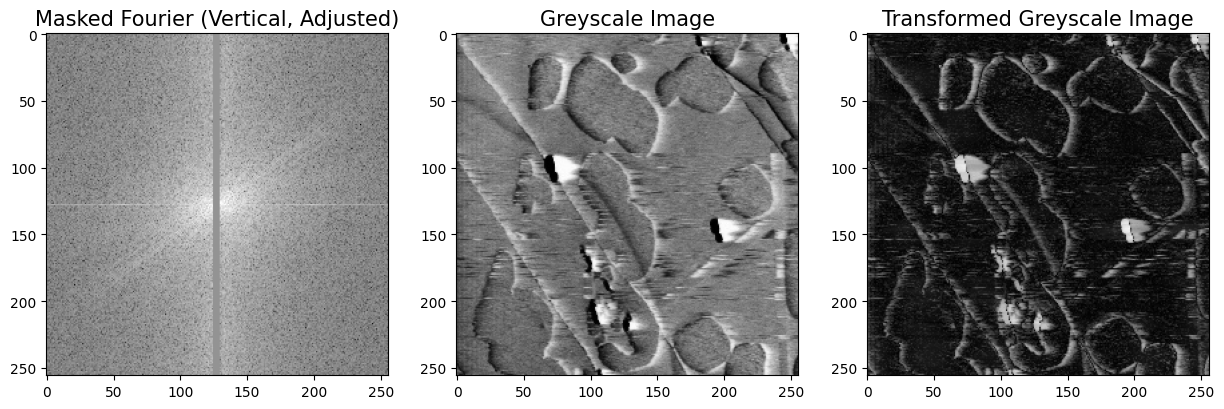

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

def fourier_masker_ver(image, mask_value, mask_width=20, mask_offset=0):
    f_size = 15

    # Convert the image to grayscale
    dark_image_grey = rgb2gray(image)

    # Compute the Fourier Transform of the grayscale image
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))

    # Apply the vertical mask to the Fourier Transform, with offset for noise alignment
    dark_image_grey_fourier[:, mask_offset:mask_offset+mask_width] = mask_value  # Mask columns with offset

    # Display the Masked Fourier Transform
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(np.log(np.abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier (Vertical, Adjusted)', fontsize=f_size)

    # Display the Greyscale Image
    ax[1].imshow(dark_image_grey, cmap='gray')
    ax[1].set_title('Greyscale Image', fontsize=f_size)

    # Display the Transformed Greyscale Image
    ax[2].imshow(np.abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize=f_size)

    plt.show()

# Load the image
dark_image = imread("/content/patch_0_0.jpg")

# Example usage: Adjust mask_width and mask_offset to target noise
fourier_masker_ver(dark_image, 10, mask_width=5, mask_offset=125)

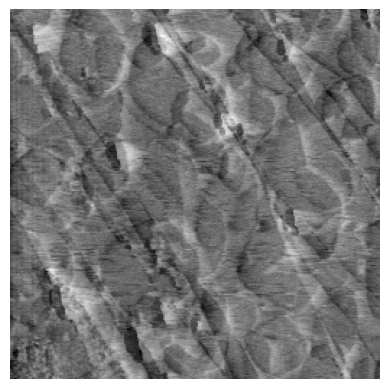

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

def fourier_masker_circle(image, mask_value, mask_radius):
    f_size = 15

    # Convert the image to grayscale
    dark_image_grey = rgb2gray(image)

    # Compute the Fourier Transform of the grayscale image
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))

    # Create a circular mask
    rows, cols = dark_image_grey_fourier.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), dtype=bool)
    y, x = np.ogrid[:rows, :cols]
    mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= mask_radius ** 2
    mask[mask_area] = False

    # Apply the circular mask to the Fourier Transform
    dark_image_grey_fourier[mask] = mask_value

    return np.abs(np.fft.ifft2(dark_image_grey_fourier))

# Load the images and apply Fourier Transform with circular masking
images = []
for i in range(2):
    for j in range(2):
        image = imread(f"/content/patch_{i}_{j}.jpg")
        transformed_image = fourier_masker_circle(image, 0, mask_radius=1000)
        images.append(transformed_image)

# Combine the transformed images
combined_image = np.mean(images, axis=0)

# Normalize combined image values to [0, 255] if max and min are different
min_val = np.min(combined_image)
max_val = np.max(combined_image)

# Check if min and max are different
if min_val != max_val:
    # Perform normalization
    combined_image_normalized = (combined_image - min_val) / (max_val - min_val) * 255
    # Ensure values are within [0, 255] range
    combined_image_normalized = np.clip(combined_image_normalized, 0, 255)
    # Convert to uint8
    combined_image_normalized = combined_image_normalized.astype(np.uint8)
else:
    # Set all pixels to 0 if min and max are the same
    combined_image_normalized = np.zeros_like(combined_image, dtype=np.uint8)

# Display the combined image
plt.imshow(combined_image_normalized, cmap='gray')
plt.axis('off')
plt.show()

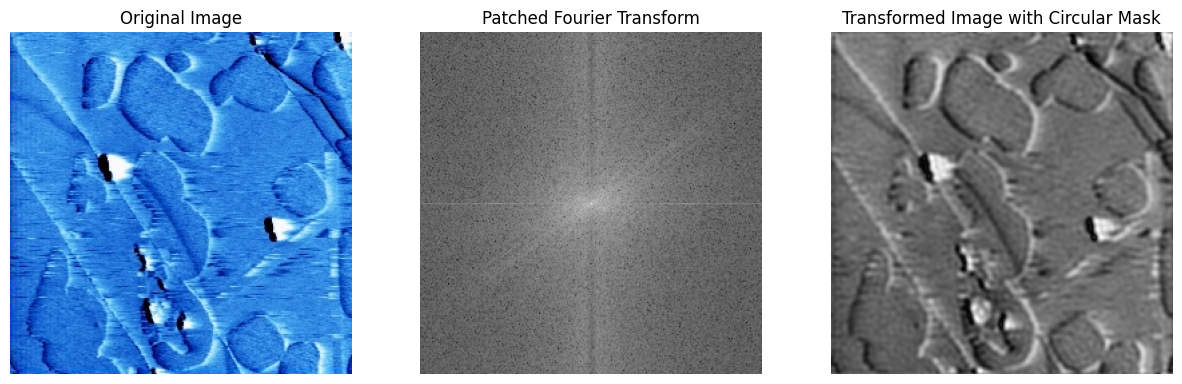

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from patchify import patchify

def fourier_masker_circle(image, mask_radius):
    # Convert the image to grayscale
    dark_image_grey = rgb2gray(image)

    # Compute the Fourier Transform of the grayscale image
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))

    # Create a circular mask
    rows, cols = dark_image_grey_fourier.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), dtype=bool)
    y, x = np.ogrid[:rows, :cols]
    mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= mask_radius ** 2
    mask[mask_area] = False

    # Apply the circular mask to the Fourier Transform
    masked_fourier = dark_image_grey_fourier.copy()
    masked_fourier[mask] = 0

    # Transform the masked Fourier back to spatial domain
    transformed_image = np.abs(np.fft.ifft2(masked_fourier))

    return dark_image_grey_fourier, transformed_image

# Load the image
dark_image = imread("/content/patch_0_0.jpg")

# Apply Fourier Transform with circular masking
fourier_transform, transformed_image = fourier_masker_circle(dark_image, mask_radius=50)

# Display the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(dark_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the patched Fourier transform
plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(fourier_transform)), cmap='gray')
plt.title('Patched Fourier Transform')
plt.axis('off')

# Display the transformed image with circular masking
plt.subplot(1, 3, 3)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image with Circular Mask')
plt.axis('off')

plt.show()